
#Obliczenia Inżynierskie w Chmurze

Celem projektu jest instalacja systemu operacyjnego ROS (Robot Operating System) wraz z pakietem ROSARIA (ROS Advanced Robot Interface for Applications) na maszynie wirtualnej w kontenerze Docker oraz wykonanie podstawowych procedur w ramach sprawdzenia działania.

# Maszyna wirtualna
W pierwszym kroku na platformie Microsoft Azure stworzona została maszyna wirtualna z obrazem systemu Ubuntu 20.04. Właściwości sieci przedstawia poniższy rysunek:

Połączenie z tak powstałą maszyną wirtualną nastąpiło za pośrednictwem protokołu SSH podajać publiczny adres IP, następnie podając hasło.



```
ssh tomasz_p@20.107.240.158
```

# Docker
Po nawiązaniu połączenia nastąpił proces instalacji Dockera. W pierwszym kroku nastąpiła konfiguracja repozytorium dla Dockera:



```
sudo apt-get update
sudo apt-get install ca-certificates curl gnupg
sudo install -m 0755 -d /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
sudo chmod a+r /etc/apt/keyrings/docker.gpg
echo \
  "deb [arch=$(dpkg --print-architecture) signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu \
  $(. /etc/os-release && echo "$VERSION_CODENAME") stable" | \
  sudo tee /etc/apt/sources.list.d/docker.list > /dev/null
sudo apt-get update
```

Następnie instalacja pakietów Dockera
```
 sudo apt-get install docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin
```
W celu sprawdzenia poprawności instalacji urochomiony został podstawowy obraz Dockera o nazwie "hello-world"
```
sudo docker run hello-world
```
Jak widać na powyższym obrazie instalacja zakończyła się sukcesem.

#Docker i ROS

Następnie ściągnięto obraz kontenera z konkretną wersją ROS Noetic i uruchomiono go.
```
sudo docker pull ros:noetic-robot
sudo docer run -it ros:noetic-robot
```
W ten sposób uruchomiony został obraz kontenera z zainstalowanym oprogramowaniem ROS.

Uruchamiając nowy terminal, analogicznie łącząc się z maszyną wirtualną za pomocą ssh można sprawdzić ID uruchomionego kontenera czy jego nazwę.
```
sudo docker ps -l
```
Bazując na nazwie kontenera można się do niego podłączyć z poziomu innego terminala za pomocą:
```
sudo docker exec -it zen_tesla bash
```
W kolejnym kroku należy zainicjalizować środowisko ROS, można w tym celu wykorzystać skrypt zawarty w obrazie naszego kontenera
```
source ros_entrypoint.sh
```
Następnie stworzony zostanie ROS workspace gdzie umieszczony zostanie pakiet ROSARIA
```
mkdir -p ~/pioneer_ws/src
cd ~/pioneer_ws/src
catkin_init_workspace
cd ~/pioneer_ws
catkin_make
```
Należy pamiętać że za każdym razem przy używaniu stworzonego workspace o nazwie pioneer_ws do budowania pakietów należy wykonać poniższą komendę. W celu optymalizacji tego procesu można edytować plik .bashrc
```
. /devel/setup.bash
```
Następnie aby zainstalować pakiet ROSARIA klonujemy repozytorium git w którym możemy je znaleźć (pamiętając o ewentalnym wcześniejszym zainstalowaniu gita).
```
cd ~/pioneer_ws/src
git clone https://github.com/amor-ros-pkg/rosaria.git
```
Dodatkowo sklonować należy repozytorium AriaCoda i zbudować również ten pakiet.
```
git clone https://github.com/reedhedges/AriaCoda.git
```
Budowa AriaCoda rozpoczyma się od instalacji compilatora GNU C++ (g++/gcc).
```
sudo apt install make g++
```
Następnie w folderze AriaCoda wykonuje się funkcja make
```
cd ~/pioneer_ws/src/AriaCoda
make
```
Do poprawnej instalacji AriaCoda należy doinstalować Doxygen API
```
sudo apt-get install doxygen
```
Następnie przeprowadzona została instalacja całego pakietu
```
sudo make install
make install-doc
```
Dzięki temu możliwe jest wywołanie tej samej funkcji tym razem dla paczki ROSARIA
```
catkin_make
```
# Walidacja instalacji
W ramach sprawdzenia poprawności instalacji wszystkich wyżej opisanych pakietów, wykorzystano wcześniej przygotowane gotowe procedury, które zostały zaimplementowane przez twórców jako poradniki, służące do nauki ROSa.

Przykładowo najprostszym testem jest sprawdzenie kominikacji pomiędzy węzłami ('nodes') rozmówcy ('talker) i słuchacza (listener). Aby zrealizować to zadanie potrzebne będą 3 terminale, pamiętając że po otwarciu nowego okna należy użyć komendy:
```
. devel/setup.bash
```
Następnie w 1 terminalu uruchamiamy
```
roscore
```
Jest to niezbędne aby jakikolwiek inny węzeł w danym workspace mógł działać i komunikować się, dlatego roscore musi być zawsze uruchomiony.

W terminalu numer 2 uruchamiany zostanie słuchacz, który będzie odbierał wiadomosći wysłane przez rozmówcę, który uruchomiony jest w 3 terminalu.
```
rosrun rospy_tutorials listener
rosrun rospy_tutorials talker
```
Poniższy rysunek przedstawia

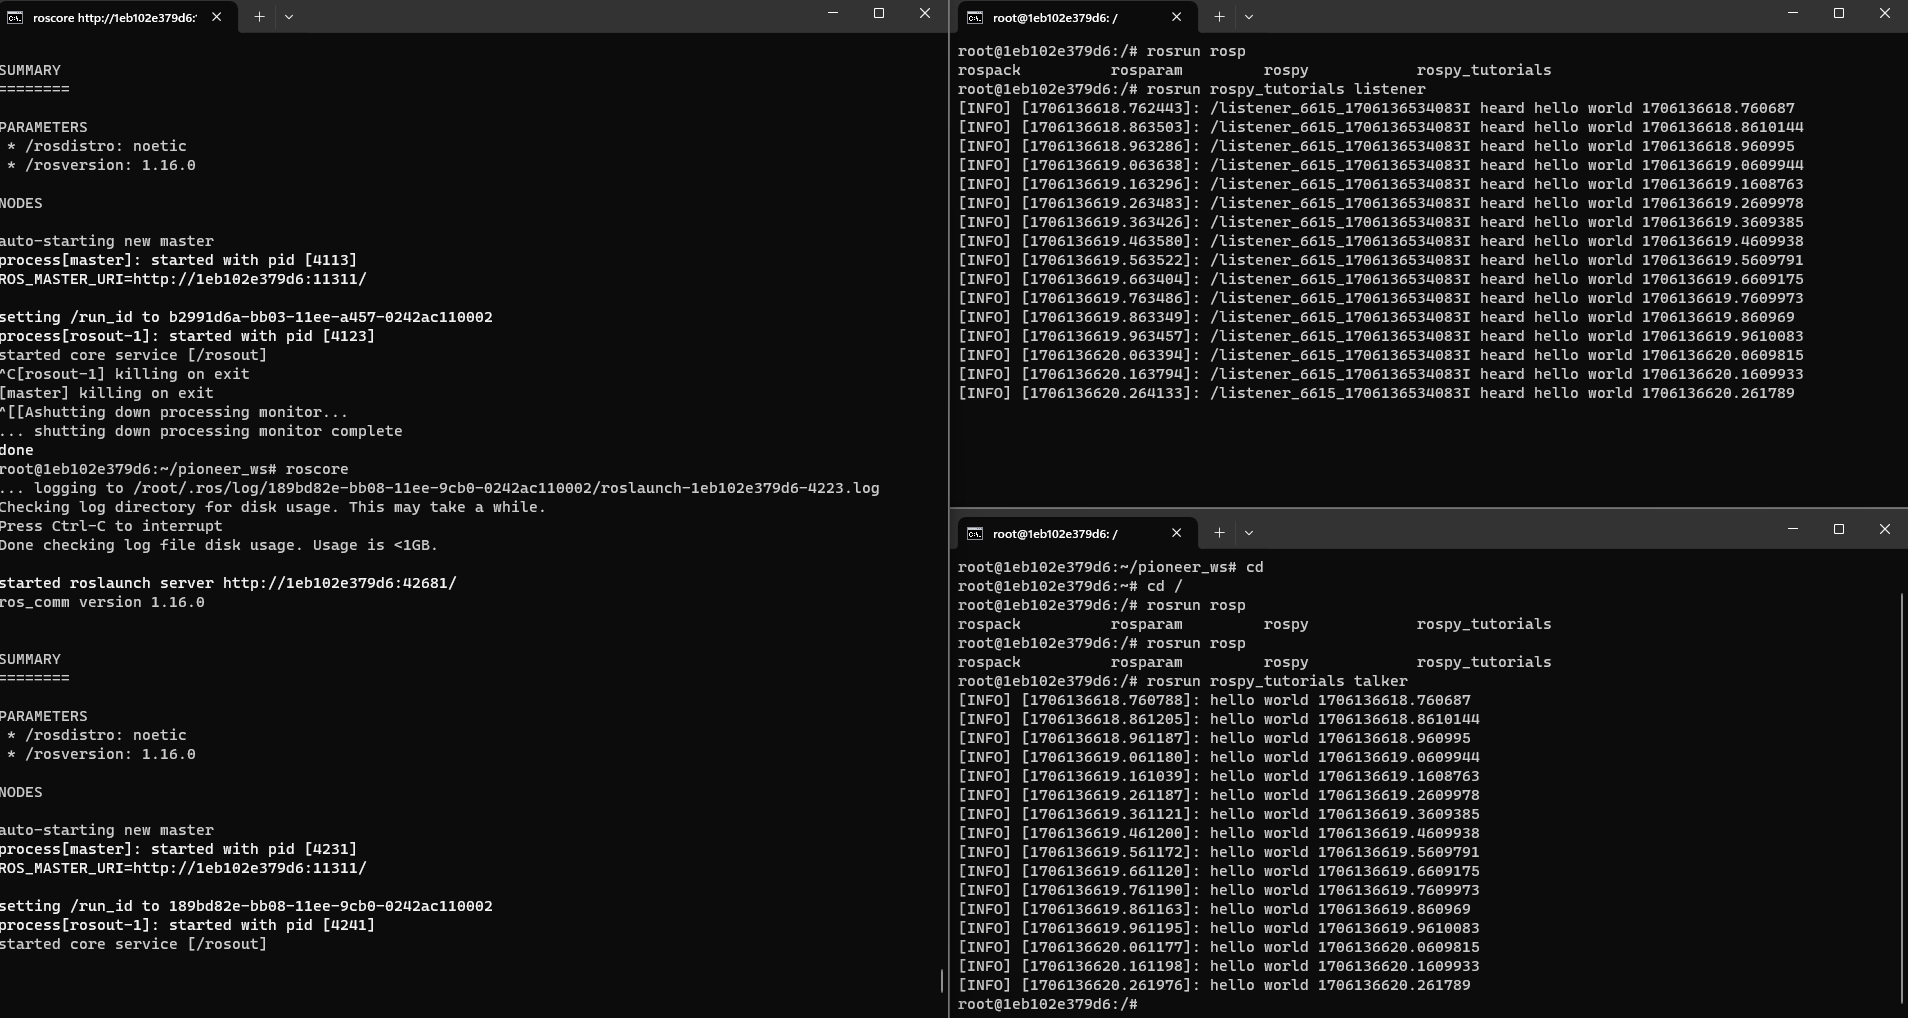
